In [15]:
import pandas as pd

df1 = pd.read_csv('AppleNewsStock.csv', header =None)
df1.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'News']

#remove redundant columns
df1.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df1

,Date,Adj Close,News
0,01/12/2006,13.045714,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...
1,04/12/2006,13.017143,More on Housing Prices : The broadest governme...
2,05/12/2006,13.038571,NaN
3,06/12/2006,12.832857,Honoring R.W. Apple in Words and Food : About ...
4,07/12/2006,12.434286,"Homebuilders, and Worries Over Jobs, Lead a De..."
...,...,...,...
2512,23/11/2016,111.230003,NaN
2513,25/11/2016,111.790001,Fighting iOS Calendar Spam : Unsolicited invit...
2514,28/11/2016,111.570000,NaN
2515,29/11/2016,111.459999,NaN


In [16]:
from datetime import datetime
newDateList = [] #a new formated list of dates(changed from string to date type)
for dateOfNews in df1['Date']:
    date_obj = datetime.strptime(dateOfNews,'%d/%m/%Y').date()
    newDateList.append(date_obj)
df1['NewDate'] = newDateList
#df1- print for check
#after checking the new date is fine, drop the old one
df1.drop(['Date'], axis=1, inplace=True)
df1

,Adj Close,News,NewDate
0,13.045714,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,2006-12-01
1,13.017143,More on Housing Prices : The broadest governme...,2006-12-04
2,13.038571,NaN,2006-12-05
3,12.832857,Honoring R.W. Apple in Words and Food : About ...,2006-12-06
4,12.434286,"Homebuilders, and Worries Over Jobs, Lead a De...",2006-12-07
...,...,...,...
2512,111.230003,NaN,2016-11-23
2513,111.790001,Fighting iOS Calendar Spam : Unsolicited invit...,2016-11-25
2514,111.570000,NaN,2016-11-28
2515,111.459999,NaN,2016-11-29


In [17]:
#we use vader because it is trained based on social media and news
#just a coincidence that our team is called emperor palpatine
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

#replace nan values with something netural
df1['News'].fillna('-', inplace=True)

#calculate the polarity scores
for title in df1['News']:
    pol_score = sia.polarity_scores(title)
    pol_score['news'] = title
    results.append(pol_score)
results

[{'neg': 0.032,
  'neu': 0.905,
  'pos': 0.063,
  'compound': 0.7707,
  'news': "WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD AND YOUTHAIDS: CONFRONTING THE PANDEMIC -- In 2002 Ms. Judd (above right) became the goodwill ambassador for YouthAIDS, an organization that promotes AIDS prevention and treatment. In this special she travels through Centr...A Bubble Watcher Watches Google : Compared with the late-’90s technology boom, there are few initial public offerings, making it harder to determine when an Internet downturn has begun.For Residents in the West Bronx, an Online Newspaper : Community journalism has finally come to Mount Hope in the form of The Mount Hope Monitor, an online newspaper.Sony Shifts Duties of the Leader of the PlayStation Unit : Ken Kutaragi, the father of the PlayStation game console, will no longer run the day-to-day affairs of Sony’s video game unit.The World, and the City, According to Steinberg : The shows at both the Morgan Library and the Museum of the City

In [18]:
#the most important feature from polarity scores is the compound
#add it to the data frame for the correspoonding date
df1['Score'] = pd.DataFrame(results)['compound']
df1

,Adj Close,News,NewDate,Score
0,13.045714,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,2006-12-01,0.7707
1,13.017143,More on Housing Prices : The broadest governme...,2006-12-04,0.8720
2,13.038571,-,2006-12-05,0.0000
3,12.832857,Honoring R.W. Apple in Words and Food : About ...,2006-12-06,0.6858
4,12.434286,"Homebuilders, and Worries Over Jobs, Lead a De...",2006-12-07,-0.6712
...,...,...,...,...
2512,111.230003,-,2016-11-23,0.0000
2513,111.790001,Fighting iOS Calendar Spam : Unsolicited invit...,2016-11-25,-0.8990
2514,111.570000,-,2016-11-28,0.0000
2515,111.459999,-,2016-11-29,0.0000


In [19]:
#convert from string to float (adj close)
floatValues = []

for value in df1['Adj Close']:
    floatValues.append(float(value))
df1['Adj Close (Float)'] = pd.DataFrame(floatValues)

#this is the gain or loss of the company, from one day to another in percentages
df1['Returns'] = df1['Adj Close (Float)']/df1['Adj Close (Float)'].shift(1)-1
df1

,Adj Close,News,NewDate,Score,Adj Close (Float),Returns
0,13.045714,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,2006-12-01,0.7707,13.045714,NaN
1,13.017143,More on Housing Prices : The broadest governme...,2006-12-04,0.8720,13.017143,-0.002190
2,13.038571,-,2006-12-05,0.0000,13.038571,0.001646
3,12.832857,Honoring R.W. Apple in Words and Food : About ...,2006-12-06,0.6858,12.832857,-0.015777
4,12.434286,"Homebuilders, and Worries Over Jobs, Lead a De...",2006-12-07,-0.6712,12.434286,-0.031059
...,...,...,...,...,...,...
2512,111.230003,-,2016-11-23,0.0000,111.230003,-0.005098
2513,111.790001,Fighting iOS Calendar Spam : Unsolicited invit...,2016-11-25,-0.8990,111.790001,0.005035
2514,111.570000,-,2016-11-28,0.0000,111.570000,-0.001968
2515,111.459999,-,2016-11-29,0.0000,111.459999,-0.000986


In [20]:
#now we can drop adj close, because the string values are redundant
df1.drop(['Adj Close'], axis=1, inplace=True)
df1

,News,NewDate,Score,Adj Close (Float),Returns
0,WHAT'S ON TONIGHT : 8 P.M. (TLC) ASHLEY JUDD A...,2006-12-01,0.7707,13.045714,NaN
1,More on Housing Prices : The broadest governme...,2006-12-04,0.8720,13.017143,-0.002190
2,-,2006-12-05,0.0000,13.038571,0.001646
3,Honoring R.W. Apple in Words and Food : About ...,2006-12-06,0.6858,12.832857,-0.015777
4,"Homebuilders, and Worries Over Jobs, Lead a De...",2006-12-07,-0.6712,12.434286,-0.031059
...,...,...,...,...,...
2512,-,2016-11-23,0.0000,111.230003,-0.005098
2513,Fighting iOS Calendar Spam : Unsolicited invit...,2016-11-25,-0.8990,111.790001,0.005035
2514,-,2016-11-28,0.0000,111.570000,-0.001968
2515,-,2016-11-29,0.0000,111.459999,-0.000986


In [30]:
#we need to shift one position down the scores
#this is because the correlation is to be made between the news from today and the returns of the next day
#this approach may not be ideal since there are some days missing and days without news
df2 =  pd.DataFrame()
df2['Score (Shifted)'] = df1['Score'].shift(1)
df2['Returns'] = df1['Returns']
df2['Date'] =df1['NewDate']
df2

,Score (Shifted),Returns,Date
0,NaN,NaN,2006-12-01
1,0.7707,-0.002190,2006-12-04
2,0.8720,0.001646,2006-12-05
3,0.0000,-0.015777,2006-12-06
4,0.6858,-0.031059,2006-12-07
...,...,...,...
2512,-0.8885,-0.005098,2016-11-23
2513,0.0000,0.005035,2016-11-25
2514,-0.8990,-0.001968,2016-11-28
2515,0.0000,-0.000986,2016-11-29


In [32]:
#replace nan with 0
df2.fillna(0, inplace=True)
df2

,Score (Shifted),Returns,Date
0,0.0000,0.000000,2006-12-01
1,0.7707,-0.002190,2006-12-04
2,0.8720,0.001646,2006-12-05
3,0.0000,-0.015777,2006-12-06
4,0.6858,-0.031059,2006-12-07
...,...,...,...
2512,-0.8885,-0.005098,2016-11-23
2513,0.0000,0.005035,2016-11-25
2514,-0.8990,-0.001968,2016-11-28
2515,0.0000,-0.000986,2016-11-29


<AxesSubplot:xlabel='Score (Shifted)', ylabel='Returns'>

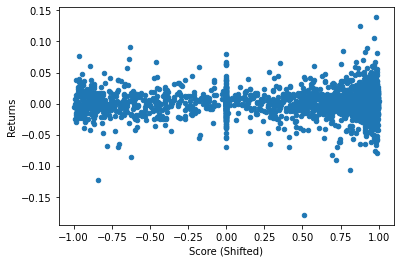

In [34]:
#plot the socres and returns
import matplotlib.pyplot as plt
%matplotlib inline
df2.plot.scatter(x='Score (Shifted)', y='Returns')

In [35]:
#remove the values where the score is insignificant (let's say between -0.25 and 0.25)
df3 = df2[(df2['Score (Shifted)']>0.25) | (df2['Score (Shifted)']<-0.25)]
df3

,Score (Shifted),Returns,Date
1,0.7707,-0.002190,2006-12-04
2,0.8720,0.001646,2006-12-05
4,0.6858,-0.031059,2006-12-07
5,-0.6712,0.014016,2006-12-08
7,-0.8743,-0.029408,2006-12-12
...,...,...,...
2509,0.9231,0.001000,2016-11-18
2510,0.8640,0.015174,2016-11-21
2511,-0.6908,0.000627,2016-11-22
2512,-0.8885,-0.005098,2016-11-23


<AxesSubplot:xlabel='Score (Shifted)', ylabel='Returns'>

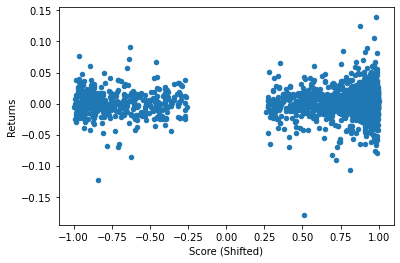

In [36]:
#and plot the data again
df3.plot.scatter(x='Score (Shifted)', y='Returns')

<AxesSubplot:xlabel='Date', ylabel='Returns'>

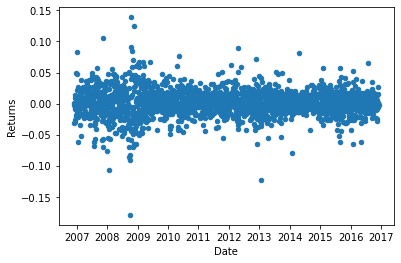

In [39]:
#plot the return against the date
df3.plot.scatter(x='Date', y='Returns')

In [74]:
#now we need to split the data into train and test set
#this will be done based on chronology rather than randomly (using train_test_split)
train_size = round(df3.shape[0]*8/10) #80%
test_size = df3.shape[0] - train_size #the remaining 20%
x = df3['Score (Shifted)']
y = df3['Returns']
x_train = x[:train_size]
x_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
#format the shape for fitting
x_train = x_train.to_numpy()
x_train = x_train.reshape(x_train.shape[0],1)
x_test = x_test.to_numpy()
x_test = x_test.reshape(x_test.shape[0], 1)

In [75]:
#now we can create a regression model to predict the return based on aricles/news depending on their score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
estimator = KernelRidge(kernel='rbf', gamma=0.1)
param_grid = {'alpha': [1e0, 0.1, 1e-2, 1e-3],
             'gamma': np.logspace(-2,2,5)}
search = GridSearchCV(estimator, param_grid=param_grid)
search.fit(x_train, y_train)

GridSearchCV(estimator=KernelRidge(gamma=0.1, kernel='rbf'),
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [79]:
print(search.best_params_)

{'alpha': 1.0, 'gamma': 0.01}


<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

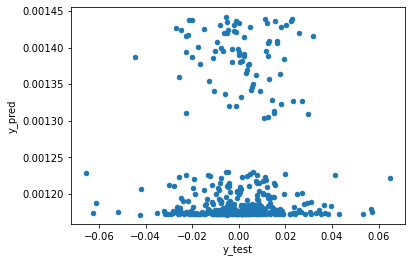

In [80]:
#predict the values
y_pred = search.predict(x_test)
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}).plot.scatter(x='y_test', y='y_pred')